In [ ]:
import torch
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동 (코랩 새로 켤 때마다 지워지기 땜에)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 구글 GPU 좀 써보자

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS 와 test_DS 구경

In [ ]:
transform = transforms.ToTensor() # 텐서로 바꿔 줘
train_DS = datasets.CIFAR10(root = "/content/drive/MyDrive/Colab Notebooks/data", train=True, download=True, transform=transform) 
test_DS = datasets.CIFAR10(root = "/content/drive/MyDrive/Colab Notebooks/data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
50000
10000


In [ ]:
train_DS.classes # . 뒤에서 탭 하면 이것저것 볼 수 있는 게 뜬다

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
train_DS.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
train_DS.data.shape

(50000, 32, 32, 3)

In [ ]:
train_DS.data[0] # 첫번째 사진

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

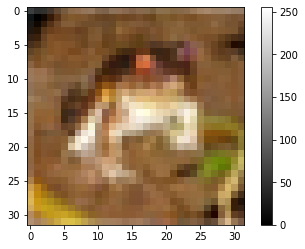

In [ ]:
plt.imshow(train_DS.data[0], cmap="gray")
plt.colorbar()

In [ ]:
print(train_DS.targets)
print(torch.tensor(train_DS.targets).shape)

## DataLoader 구경

In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle=True)

In [ ]:
len(train_DL.dataset)

50000

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([32, 3, 32, 32])
torch.Size([32])
tensor(9)
uint8
torch.float32


<ipython-input-14-5cfcef6b0051>:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(x_batch[0].squeeze().T, cmap="gray")


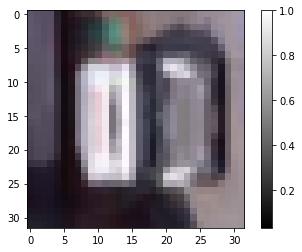

In [ ]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자

print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape) # [32,3,32,32] 32개 * 3 32 32개 채널
# print(x_batch[0].squeeze().T.shape)
print(y_batch.shape)
plt.imshow(x_batch[0].squeeze().T, cmap="gray")
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)
# ToTensor 의 역할
# 1. tensor로 바꿔준다
# 2. 개채행열로 바꿔준다
# 3. 0~1 사이로 바꿔준다 (int -> float)

## 본격적으로 model 만들기!

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(3*32*32, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10))
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [ ]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch) # 모든 차원을 쫙쫙펴라
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1) # 1번째째 dimension부터 쫙쫙펴라
print(flat_images2.shape)

torch.Size([32, 3, 32, 32])
torch.Size([98304])
torch.Size([32, 3072])


In [ ]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
model(x_batch.to(DEVICE))

MLP(
  (linear): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


tensor([[ 3.1784e-01, -1.4146e-01,  2.9153e-01, -7.5328e-05,  1.8928e-01,
          7.6613e-02,  2.7078e-01,  1.2664e-01, -2.1380e-01, -2.7018e-01],
        [ 1.5561e-01, -7.4584e-02,  1.5933e-01, -6.4879e-03,  5.6117e-02,
          6.9942e-02,  8.6367e-02,  6.7273e-03, -8.6861e-02,  1.2472e-02],
        [ 2.5122e-01, -9.9283e-02,  2.5579e-01, -2.0443e-02,  8.4602e-02,
          1.2569e-01,  1.4188e-01, -1.4321e-02, -5.2379e-02, -5.2489e-02],
        [ 1.7604e-01, -4.8336e-02,  1.4686e-01, -2.7580e-02,  7.1461e-02,
          7.6702e-02,  6.4274e-02, -1.3312e-02, -1.9332e-02, -4.3419e-02],
        [ 2.7221e-01, -1.4132e-01,  2.6922e-01,  7.6018e-02,  9.3173e-02,
          3.8594e-02,  7.0413e-02,  2.2772e-01, -1.6073e-01, -1.2552e-01],
        [ 2.5682e-01, -1.6537e-01,  3.2769e-01, -1.7280e-02,  2.4163e-01,
         -6.3493e-02,  1.1099e-01,  1.9467e-01, -1.3696e-01, -1.5578e-01],
        [ 2.2517e-01, -1.0852e-01,  2.2784e-01,  4.0076e-02,  9.5438e-02,
          1.2402e-01,  1.1303e-0

## 모델 훈련시키기!

In [ ]:
from torch import optim
from torch.optim import lr_scheduler
from torch import nn

LR = 1e-3
EPOCH = 5 
criterion = nn.CrossEntropyLoss()

def Train(model, train_DL, criterion, optimizer):

    loss_history = []
    NoT = len(train_DL.dataset)

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0
        for x_batch, y_batch in train_DL: # x_batch: [32,3,32,32], y_batch: [32], 즉 32개씩 끊어서 가져온다
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            # BATCH_SIZE를 쓰지 않는 이유는, 마지막 배치가 32개가 아닐 수 있기 때문
            loss_b = loss.item() * x_batch.shape[0] # batch loss. loss 자체에 평균을 내기 때문에, 배치 사이즈를 곱해줘서 합을 구한다
            
            rloss += loss_b # running loss, 즉 6만장 다 돌았을때의 loss 총합
        # print loss
        loss_e = rloss/NoT # epoch loss
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)
    
    return loss_history

## Cross Entropy 확인 (왜 모델에 softmax를 안붙였을까?)

In [ ]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 3개, 5 종류로 분류하는 문제를 가정해보자
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax함수가 내장되어있음. 그래서 모델에서 마지막에 softmax 없이 사용해도 된다!
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax가 내장
print(criterion(y_hat, y_batch))

# 방법 3
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)
loss=0
for i, val in enumerate(y_hat_soft):
    print(i,val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어있음을 알 수 있다

tensor([[ 1.0472, -0.6538, -0.3639, -0.2088,  0.4658],
        [ 0.3751,  1.0873,  0.0403, -1.6746,  0.4594],
        [ 1.6928, -1.4395, -0.4914,  0.6727,  1.1927]])
tensor([0, 2, 3])
tensor(1.5104)
tensor(1.5104)
tensor([[0.4405, 0.0804, 0.1074, 0.1254, 0.2463],
        [0.2012, 0.4101, 0.1439, 0.0259, 0.2189],
        [0.4710, 0.0205, 0.0530, 0.1698, 0.2856]])
0 tensor([0.4405, 0.0804, 0.1074, 0.1254, 0.2463])
1 tensor([0.2012, 0.4101, 0.1439, 0.0259, 0.2189])
2 tensor([0.4710, 0.0205, 0.0530, 0.1698, 0.2856])
tensor(1.5104)


## 모델 학습시키기

Epoch: 1, train loss: 1.866
--------------------
Epoch: 2, train loss: 1.713
--------------------
Epoch: 3, train loss: 1.667
--------------------
Epoch: 4, train loss: 1.642
--------------------
Epoch: 5, train loss: 1.617
--------------------


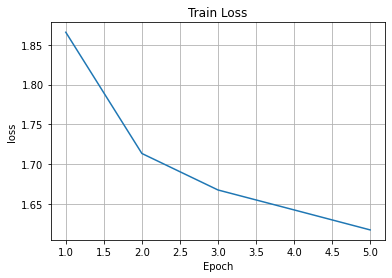

In [ ]:
model = MLP().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [39]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)

In [40]:
load_model = MLP().to(DEVICE) # 우선 모델 껍데기를 만들고
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE)) # 학습했던 모델의 weight와 bias를 불러와서 붙여넣는다.
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음 주의!!

<All keys matched successfully>

In [41]:
len(load_model.linear[0].weight)

100

## 모델 테스트하기

In [42]:
def Test(model, test_DL):
    model.eval() # test mode로 전환
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch) # [32,10]. 32장의 사진이고 10개의 class로 분류해야 하기 때문.
            # accuracy accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item() # 1개의 배치에 대해 맞춘 개수
            rcorrect += corrects_b # 전체 데이터에 대해 맞춘 개수 누적
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")
    return round(accuracy_e, 1)

In [43]:
Test(load_model, test_DL)

Test accuracy: 3986/10000 (39.9 %)


39.9

In [44]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r") 

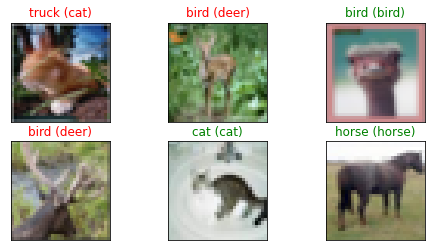

In [45]:
Test_plot(load_model, test_DL)

In [46]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [47]:
print(count_params(load_model))

308310
